<a href="https://colab.research.google.com/github/tjturnage/radar/blob/main/Plot_NEXRAD_mosaics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+4" color="green"><b>Plot NEXRAD Reflectivity Mosaics</b></font>  
<font size="+1" color="gray"><i>updated July 30, 2024</i></font>  
<hr>  

This allows the user to plot nexrad mosaic reflectivity images described at:
https://mesonet.agron.iastate.edu/docs/nexrad_mosaic/
<br />
<br />
The user can define the following:
- whether to use high or low resolution plots (low-res goes back to 1995)
- form-based selection of time range to plot
- time zone to include in the label
- plotting interval (that is, make a plot for every 5, 10, 15, etc., minutes)
- lat/lon box containing the plot
- one of two available reflectivity colormaps (additional maps available on request)
- which cities to plot (if any) and where to place the labels
- whether to plot major roads
- whether to plot county outlines
- figure size and plot aspect ratio (usually don't need to change)
- whether to create an animated gif
<br/> <br/>

A file called "radar_images.zip" will be created. This file can be downloaded and then unzipped on your local machine to extract the image files.


---
Questions or bugs? Please contact me at thomas.turnage@noaa.gov

---



In [13]:
# @title <font size="+3" color="green">Select your configuration</font> ...
# @markdown <font size="+2" color="blue"><b><i>Select the type of plot</font></b><br>Recommendation: Choose <b>"low res"</b> for multi-state plots</i></b></font>
from datetime import datetime, timedelta
import pytz


plot_type = "low res (available since 1995)" # @param ["low res (available since 1995)", "high res (available since Nov2010)"]

file_type = 'n0r'
if plot_type == "high res (available since Nov2010)":
  file_type = 'n0q'

# @markdown <font size="+2" color="blue"><b><i>Enter the start time (in UTC) for the plots</i></b></font>
start_date = "2014-04-12" # @param {type:"date"}
start_date = start_date.replace('-', '')
start_hour = "17" # @param ["00","01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
start_minute = "00" # @param ["00", "05", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55"]

# @markdown <font size="+2" color="blue"><b><i>Enter the duration in hours and minutes.</b></font><br>Example: 02 hrs, 20 mins = 2:20 duration</font>
hours_duration = "06" # @param ["00","01","02","03","04","05","06","07","08","09","10","11","12"]
plus_minutes = "00" # @param ["00","10","20","30","40","50"]
if start_date < '20101113' and file_type == 'n0q':
  print("High res not available for this time! ...")
  print("... selecting low res instead ...")
  file_type = 'n0r'

# @markdown <font size="+2" color="blue"><b><i>Select time zone for labelling your figures</i></b></font>
time_zone = "UTC" # @param ["UTC", "EST", "EDT", "CST", "CDT", "MST", "MDT", "PST", "PDT"]
time_zone_dict = {"UTC": 0, "EST":5, "EDT":4, "CST":6, "CDT":5, "MST":7, "MDT":6, "PST":8, "PDT":7 }

# @markdown <font size="+2" color="blue"><b><i>Define time interval in minutes between plots</i></b></font>
time_step = "10" # @param [5, 10, 15, 30, 45, 60]
time_step = int(time_step)

start_datetime_string = f'{start_date} {start_hour}:{start_minute}:00'

start_datetime = datetime.strptime(start_datetime_string, '%Y%m%d %H:%M:%S')
end_datetime = start_datetime + timedelta(hours=int(hours_duration), minutes=int(plus_minutes))
first_plot_time = f'{start_date}_{start_hour}{start_minute}'
last_plot_time = datetime.strftime(end_datetime,'%Y-%m-%d_%H%M')
#last_plot_time = f'{end_date}_{end_hour}{end_minute}'
print(start_datetime, end_datetime)
#if first_plot_time >= last_plot_time:
#  print("... Your start date/time must be before your end date/time !! ...")

# @markdown <font size="+2" color="blue"><b><i>Enter lat/lon values to define your plotting box</i></b></font>
lat_min = 41.0 # @param {type:"raw"}
lat_max = 45.0 # @param {type:"raw"}
lon_min = -93.0 # @param {type:"raw"}
lon_max = -82.0 # @param {type:"raw"}

def make_float(val):
  try:
    return float(val)
  except:
    print("...... WARNING !! ......................\n")
    print(f"Can't convert {val} to float!\n")
    print("...... Check values and try again ......\n")
    return

#for coor in (lat_min, lat_max, lon_min, lon_max):

lat_min = make_float(lat_min)
lat_max = make_float(lat_max)
lon_min = make_float(lon_min)
lon_max = make_float(lon_max)

# @markdown <font size="+2" color="blue"><b><i>Pick which features to include in the plot</i></b></font>
plot_counties = True # @param {type:"boolean"}
plot_roads = False # @param {type:"boolean"}
# @markdown <font size="+1" color="blue"><b><i>(Note: if plotting cities, you'll need to create your own dictionary)</i></b></font>
plot_cities = False # @param {type:"boolean"}

# @markdown <font size="+2" color="blue"><b><i>Check box for a "snow-friendly" color table</i></b></font>

snow_colormap = False # @param {type:"boolean"}
if snow_colormap:
  cmap_type = "winter"
else:
  cmap_type = "wdtd"

plot_key = f'{file_type}_{cmap_type}'
plot_dict = {'n0r_wdtd':{'cmap':'z_lowres','vmin':-30, 'vmax': 75, 'mult':5, 'subt':30.0},
             'n0q_wdtd':{'cmap':'wdtd_z','vmin':-32.5, 'vmax': 90, 'mult':0.5, 'subt':32.5},
             'n0r_winter':{'cmap':'winter_z','vmin':-30, 'vmax': 75, 'mult':5, 'subt':30.0},
             'n0q_winter':{'cmap':'winter_z','vmin':-32.5, 'vmax': 90, 'mult':0.5, 'subt':32.5}
             }

plot_values = plot_dict[plot_key]

# @markdown <font size="+2" color="blue"><b><i>If needed, adjust for undesired map stretching</b></font><br>Edit one or more of the following values - may require some testing</i></b></font>
# @markdown <font color="blue"><ol><li>Adjust your lat/lon boundary ranges</li>
# @markdown <li>Adjust the height and width dimensions of the figure.</li>
# @markdown <li>Adjust the plot aspect ratio ... >1 shrinks horizontal scale and
# @markdown vice versa.</li></ol></h4>

fig_height = 8 # @param {type:"raw"}
fig_height = int(fig_height)
fig_width = 6 # @param {type:"raw"}
fig_width = int(fig_width)
plot_aspect_ratio = 1.25 # @param {type:"raw"}
plot_aspect_ratio = float(plot_aspect_ratio)

# @markdown <font size="+2" color="blue"><b><i>Check to create animated gif</b></font><br>This will take time to load the software package ... creates a file called "animation.gif"</i>
create_animation = True # @param {type:"boolean"}
# @markdown <font size="+2" color="blue"><b><i>This sets time between frames in hundredths of a second</i></font></h4>
animation_speed ="20" # @param [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
animation_speed = int(animation_speed)

cities = {
'Grand Rapids':{'lat':42.963,'lon':-85.668, 'lat_offset':0.04, 'lon_offset':0.06},
'Muskegon':{'lat':43.234,'lon':-86.248, 'lat_offset':0.04, 'lon_offset':0.06},
'Holland':{'lat':42.7875,'lon':-86.1089, 'lat_offset':0.04, 'lon_offset':0.06},
'Lawton':{'lat':42.1675,'lon':-85.8480, 'lat_offset':-0.05, 'lon_offset':0.05},
'Marshall':{'lat':42.2722,'lon':-84.9633, 'lat_offset':-0.08, 'lon_offset':0.04},
'Battle Creek':{'lat':42.3211,'lon':-85.1800, 'lat_offset':0.04, 'lon_offset':-0.06},
'South Haven':{'lat':42.4031,'lon':-86.2736, 'lat_offset':0.04, 'lon_offset':0.06},
'Lansing':{'lat':42.7325,'lon':-84.5556, 'lat_offset':0.00, 'lon_offset':0.06},
'Kalamazoo':{'lat':42.292,'lon':-85.587, 'lat_offset':0.04, 'lon_offset':-0.14},
'Ludington':{'lat':43.955,'lon':-86.4525, 'lat_offset':0.04, 'lon_offset':0.06},
'Big Rapids':{'lat':43.698,'lon':-85.4836, 'lat_offset':0.04, 'lon_offset':0.06},
'Mount Pleasant':{'lat':43.5978,'lon':-84.7675, 'lat_offset':0.06, 'lon_offset':0.06},
#'MC109':{'lat':43.0534,'lon':-85.9080, 'lat_offset':0.06, 'lon_offset':0.06},
#'MC158':{'lat':43.0923,'lon':-86.0977, 'lat_offset':0.06, 'lon_offset':0.06},
#'MC159':{'lat':43.4101,'lon':-86.3146, 'lat_offset':0.06, 'lon_offset':0.06},
           }


2014-04-12 18:00:00 2014-04-13 00:00:00


In [ ]:
# @title <font size="+3" color="green">If you want to customize your own cities dictionary, click "Show code" below</font>
#   You'll want to test the best offset position for each of the labels.
#   Positive "lat_offset" shifts the label north by that many degrees
#   Positive "lon_offest" shifts the label east by that many degrees

cities = {
'Grand Rapids':{'lat':42.963,'lon':-85.668, 'lat_offset':0.04, 'lon_offset':0.06},
'Muskegon':{'lat':43.234,'lon':-86.248, 'lat_offset':0.04, 'lon_offset':0.06},
'Holland':{'lat':42.7875,'lon':-86.1089, 'lat_offset':0.04, 'lon_offset':0.06},
'South Haven':{'lat':42.4031,'lon':-86.2736, 'lat_offset':0.04, 'lon_offset':0.06},
'Lansing':{'lat':42.7325,'lon':-84.5556, 'lat_offset':0.00, 'lon_offset':0.06},
'Kalamazoo':{'lat':42.292,'lon':-85.587, 'lat_offset':0.08, 'lon_offset':0.04},
'Portage':{'lat':42.20,'lon':-85.59, 'lat_offset':-0.08, 'lon_offset': 0.04},
'Ludington':{'lat':43.955,'lon':-86.4525, 'lat_offset':0.04, 'lon_offset':0.06},
'Big Rapids':{'lat':43.698,'lon':-85.4836, 'lat_offset':0.04, 'lon_offset':0.06},
'Mount Pleasant':{'lat':43.5978,'lon':-84.7675, 'lat_offset':0.06, 'lon_offset':0.06},
'Portage':{'lat':42.20,'lon':-85.59, 'lat_offset':-0.08, 'lon_offset': 0.04},
#'MC109':{'lat':43.0534,'lon':-85.9080, 'lat_offset':0.06, 'lon_offset':0.06},
#'MC158':{'lat':43.0923,'lon':-86.0977, 'lat_offset':0.06, 'lon_offset':0.06},
#'MC159':{'lat':43.4101,'lon':-86.3146, 'lat_offset':0.06, 'lon_offset':0.06},
           }


In [2]:
# @title <font size="+3" color="green"> Install the needed GIS software, prepare colormaps and GIS files</font>
!pip install rasterio &> /dev/null
!pip install cartopy &> /dev/null
import sys
import os
import subprocess
import glob
from os.path import exists
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import urllib.request
import requests
from bs4 import BeautifulSoup
import zipfile
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader
import xarray as xr
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

os.chdir('/content')

def create_and_register_cmap(cmap_name, original_colors, position, rgb_input=True) -> None:
    """
    1) Converts list of color values from 8-bit (0-255 scale)
       to 0-1 decimal scale.

    2) The created final_color_list is combine with position list
       to create a matplotlib colormap.

    3) Registers the new colormap using the supplied cmap_name.

    Input
    ----------
             cmap_name : string
                         Name of the cmap you want to use and register

      original_ colors : list
                         8-bit tuples containing RGB values
                         example: [(127,256,192), (125,125,125)]

              position : list
                         node locations for color break points on
                         a 0 to 1 scale

            rgb_input : boolean
                        True: Color conversion from RGB to performed.
                       False: Color conversion from RGB is skipped.

    Returns
    -------
    None

    """
    if rgb_input:
        final_color_list = []
        for color in original_colors:
            converted_color_group = []
            for original_channel_value in color:
                new_channel_value = float(original_channel_value)/255
                converted_color_group.append(float(format(new_channel_value, '.3f')))
            converted_color_tuple = tuple(converted_color_group)
            final_color_list.append(converted_color_tuple)
    else:
        final_color_list = original_colors

    this_cmap = LinearSegmentedColormap.from_list(cmap_name, list(zip(position, final_color_list)))
    mpl.colormaps.register(cmap=this_cmap, force=True)


###############################################################################

winter_rgbs = [(0, 0, 0), (70, 70, 70), (210, 210, 210),
(0, 120, 255), (0, 0, 60), (225, 225, 0), (220, 100, 0), (220, 100, 0)]

winter_nodes = [0.0, 0.20, 0.38, 0.42, 0.48, 0.52, 0.60, 1.0]

create_and_register_cmap('winter_z', winter_rgbs, winter_nodes)

#------------------------------------------------------------------------------

wdtd_z_rgbs =[ (0, 0, 0), (0, 0, 0), (0, 0, 0), (130, 130, 130),
 (95, 189, 207), (57, 201, 105), (57, 201, 105), (0, 40, 0),
 (9, 94, 9), (255, 207, 0), (255, 207, 0), (255, 133, 0),
 (255, 0, 0), (89, 0, 0), (255, 245, 255), (225, 11, 227),
 (164, 0, 247), (99, 0, 214), (5, 221, 224), (58, 103, 181),
 (255, 255, 255),(255, 255, 255)]

def create_nodes(refs,denom,below_zero):
  nodes = []
  for r in refs:
    ref = (r + below_zero)/denom
    nodes.append(ref)
  return nodes

refs = [-32, -25.1, -25,14.99, 15,19.99, 20,34.99, 35,39.99, 40,49.99,
        50,59.99, 60,69.99, 70,74.99, 75,79.99, 80,90]

wdtd_z_nodes = create_nodes(refs,122,32)

refs = [-30, -25.1, -25, 14.99, 15,19.99, 20,34.99, 35,39.99, 40,49.99,
        50,59.99, 60,69.99, 70,74.99, 75]

low_nodes = create_nodes(refs,105,30)

create_and_register_cmap('wdtd_z', wdtd_z_rgbs, wdtd_z_nodes)
create_and_register_cmap('z_lowres', wdtd_z_rgbs[:-3], low_nodes)


###############################################################################

#scan this webpage to determine the most recent NWS County shapefile available
url = "https://www.weather.gov/gis/Counties"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
zip_links = soup.find_all("a", href=lambda href: href.endswith(".zip"))
if zip_links:
    zip_url = zip_links[-1]["href"]
    counties_url = os.path.join('https://www.weather.gov',str(zip_url)[1:])
    zip_file_name = counties_url.split("/")[-1]
    zip_file_root = zip_file_name[:-4]
    shapefile_name = f'{zip_file_root}.shp'
else:
    print("No zip files found on the website.")

if not exists(zip_file_name):
  urllib.request.urlretrieve(counties_url, "counties.zip")
  with zipfile.ZipFile('counties.zip', 'r') as zip_ref:
      zip_ref.extractall('.')

try:
  COUNTY_SHAPEFILE
except NameError:
  #reader = shpreader.Reader("tl_2019_us_county.shp")
  reader = shpreader.Reader(shapefile_name)
  features = list(reader.geometries())
  COUNTY_SHAPEFILE = cfeature.ShapelyFeature(features, ccrs.PlateCarree())

# download and read road shapefile only if plot_roads=True
if plot_roads:
  road_shapefile_name = "tl_2019_us_primaryroads.shp"
  road_url = "https://www2.census.gov/geo/tiger/TIGER2019/PRIMARYROADS/tl_2019_us_primaryroads.zip"
  if not exists(road_shapefile_name):
    urllib.request.urlretrieve(road_url, "roads.zip")
    with zipfile.ZipFile('roads.zip', 'r') as zip_roads:
      zip_roads.extractall('.')
  try:
    ROAD_SHAPEFILE
  except NameError:
    #reader = shpreader.Reader("tl_2019_us_primary_roads.shp")
    road_reader = shpreader.Reader(road_shapefile_name)
    features = list(road_reader.geometries())
    ROAD_SHAPEFILE = cfeature.ShapelyFeature(features, ccrs.PlateCarree())



plt.rcParams['font.size'] = 10
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['lines.markersize'] = 6
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['text.color'] = 'white'
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['scatter.marker'] = 'o'




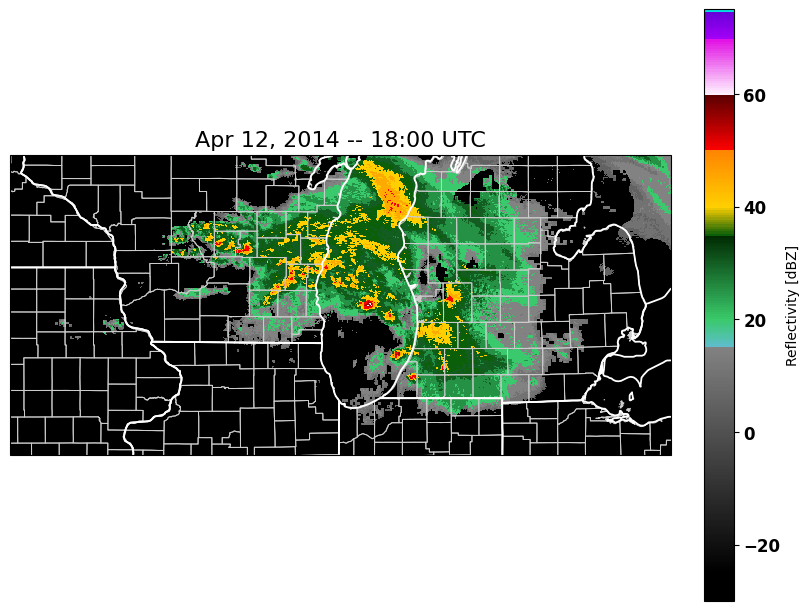

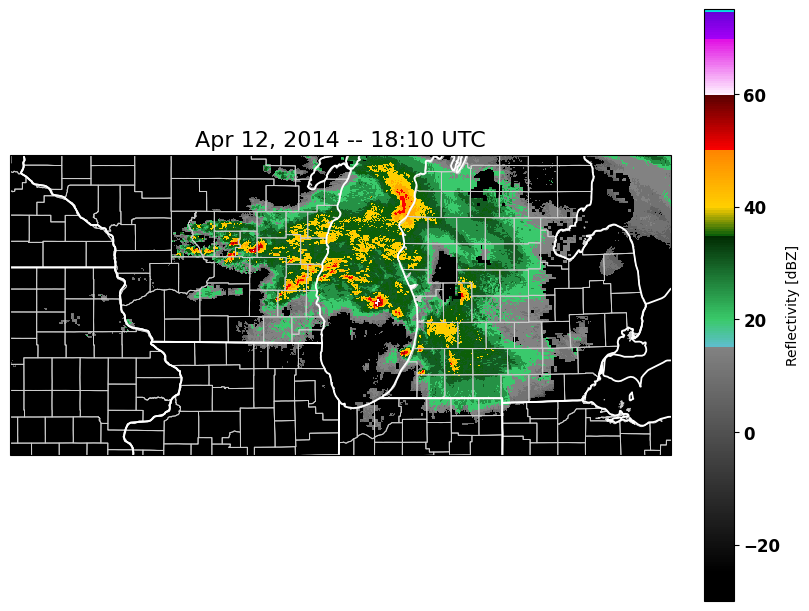

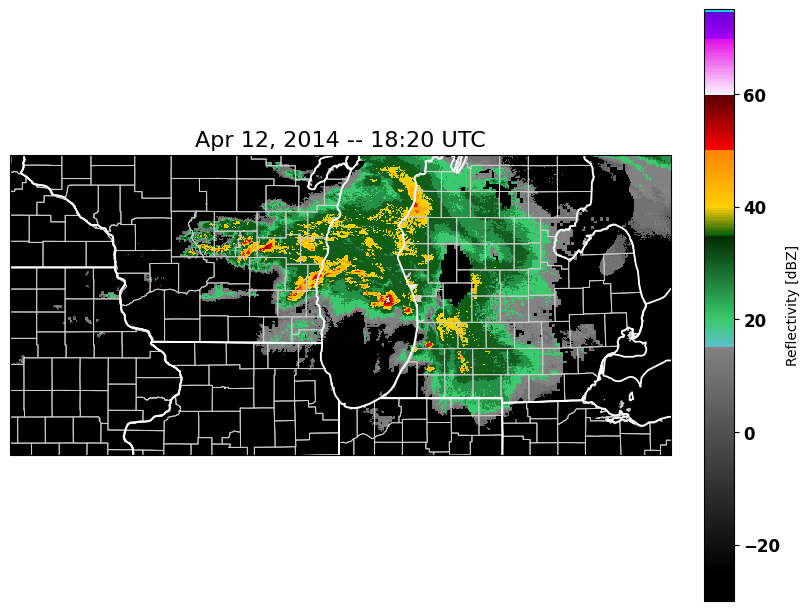

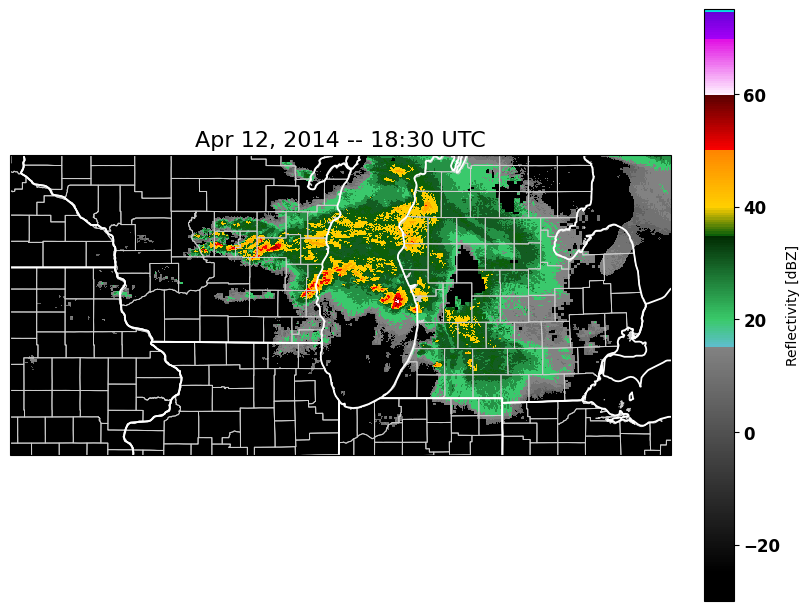

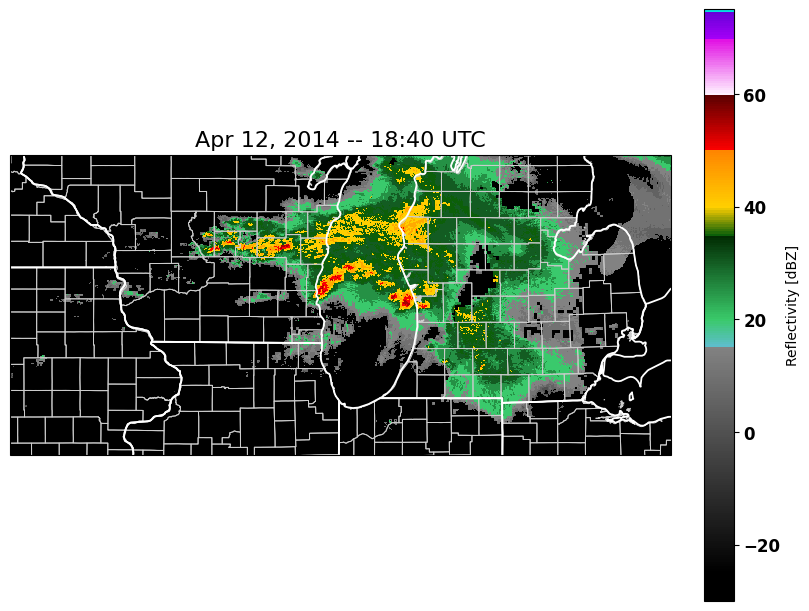

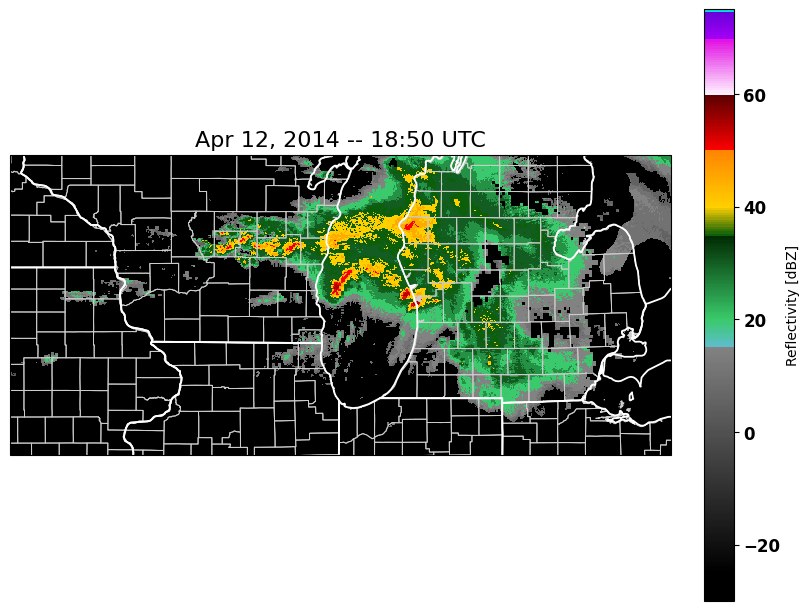

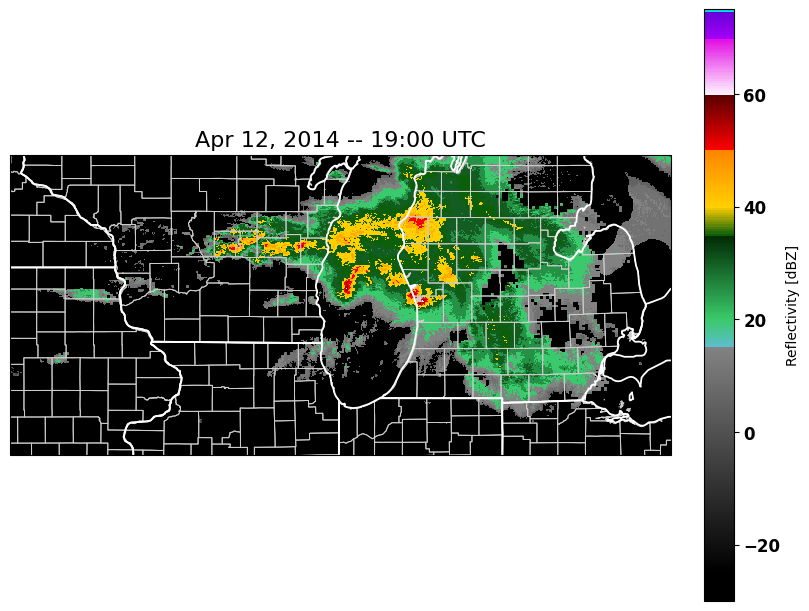

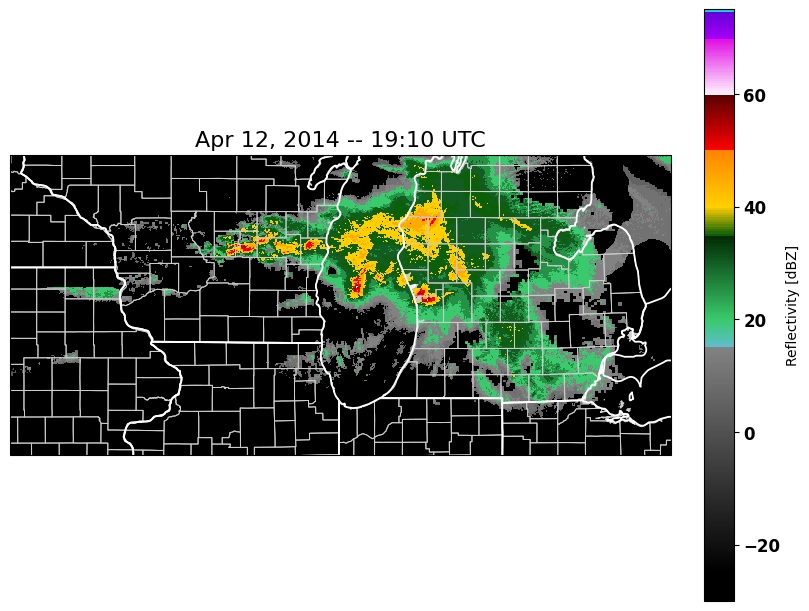

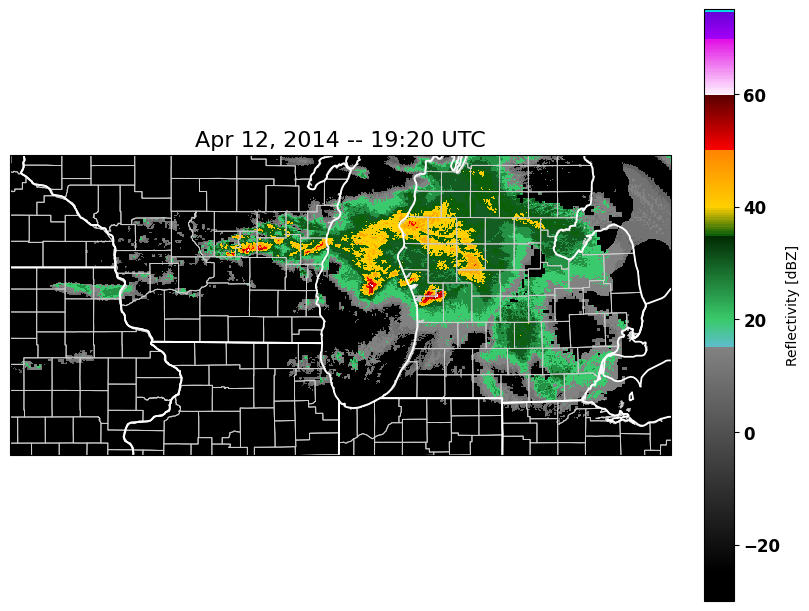

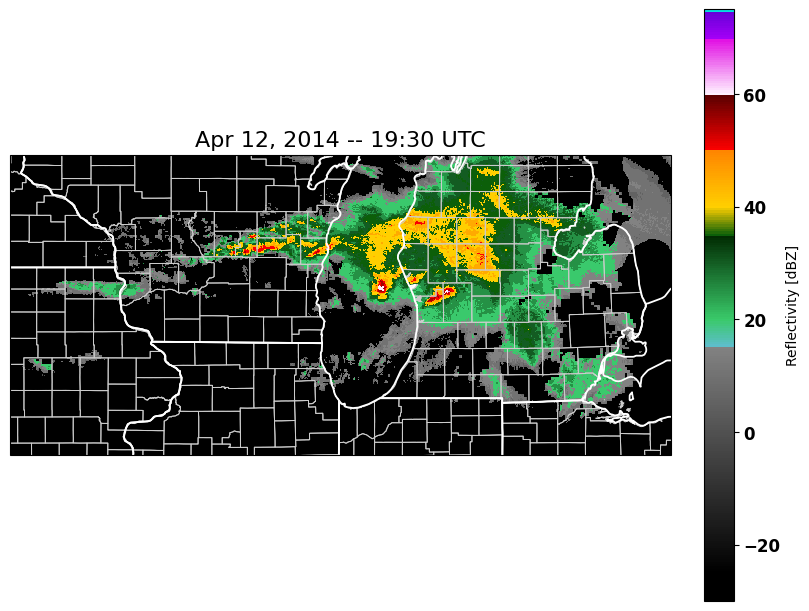

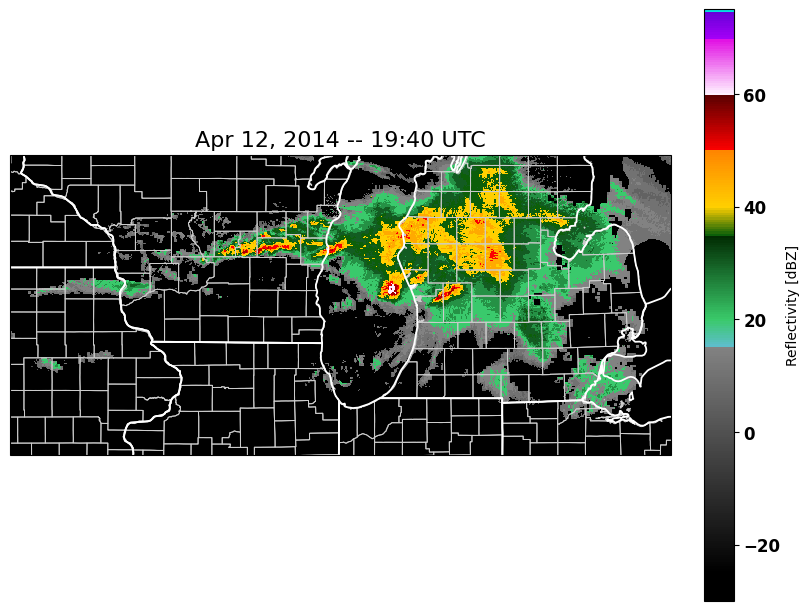

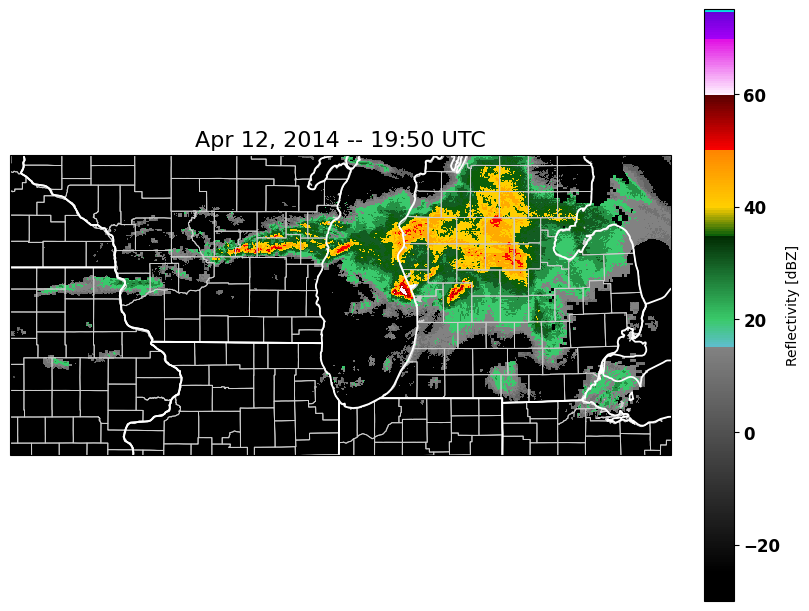

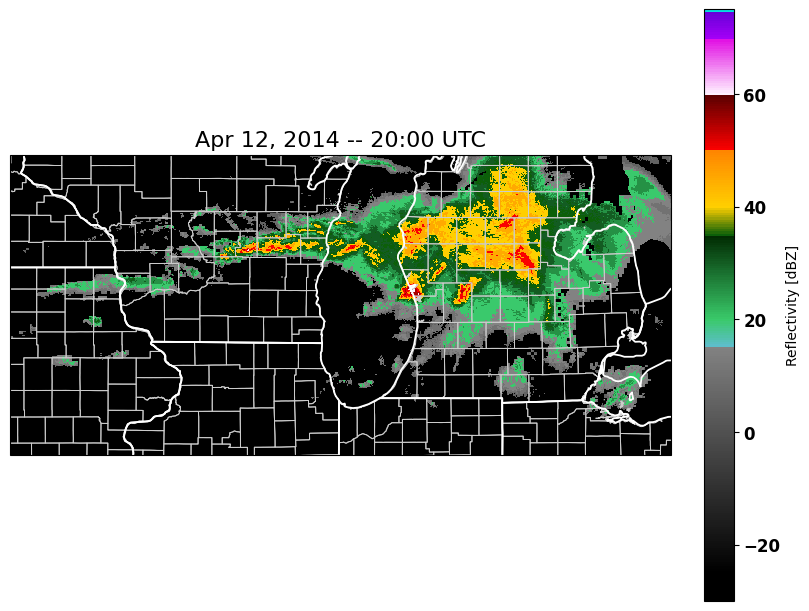

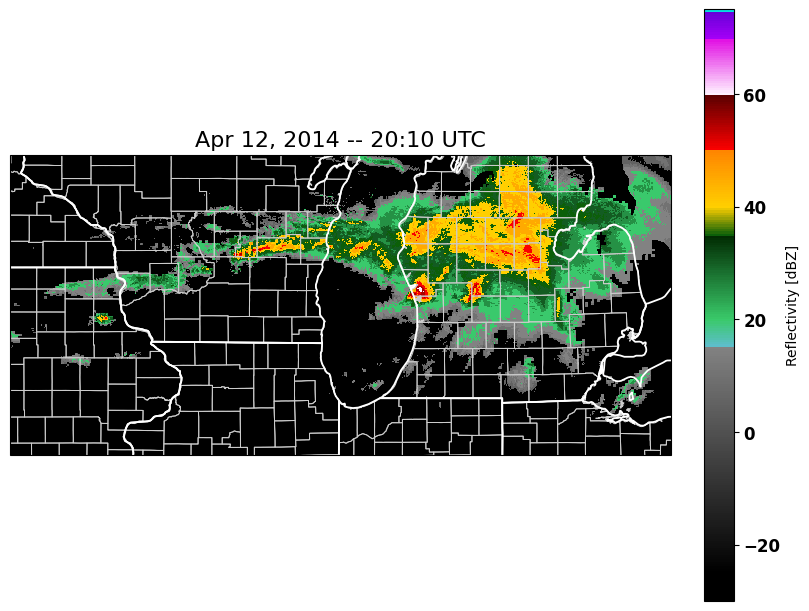

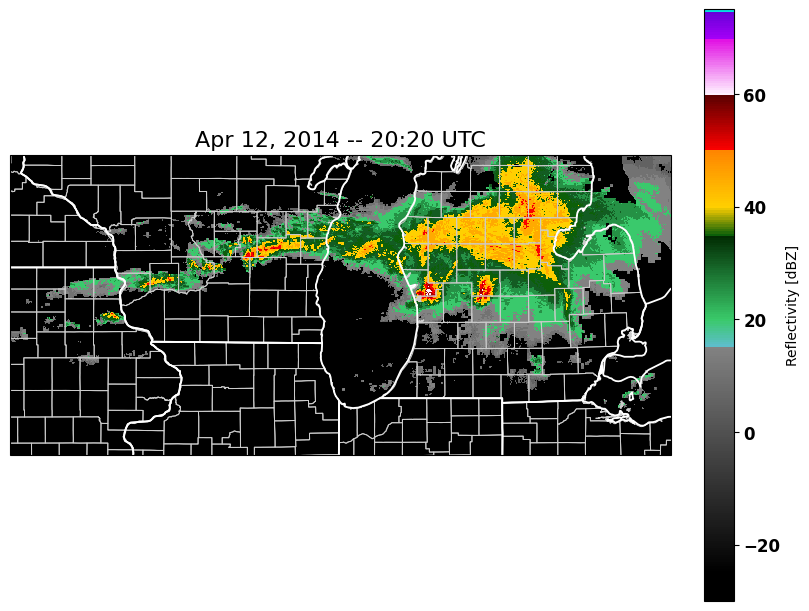

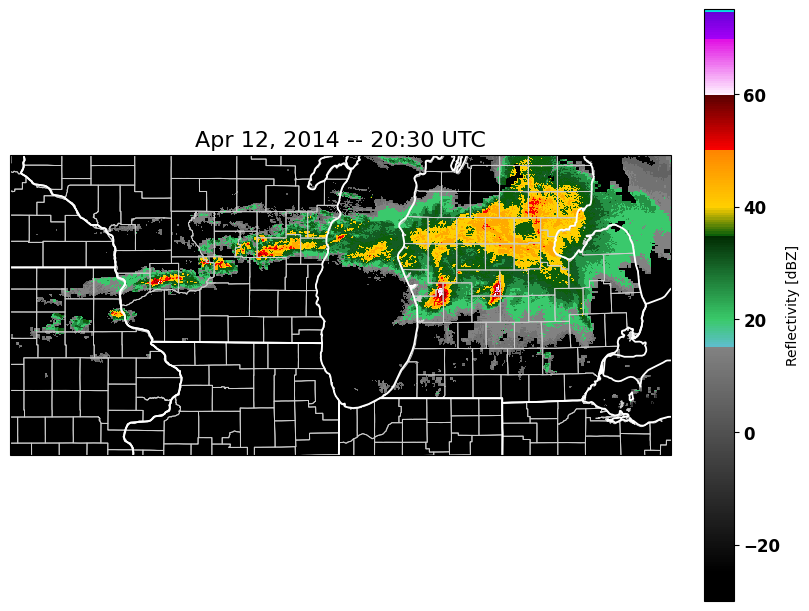

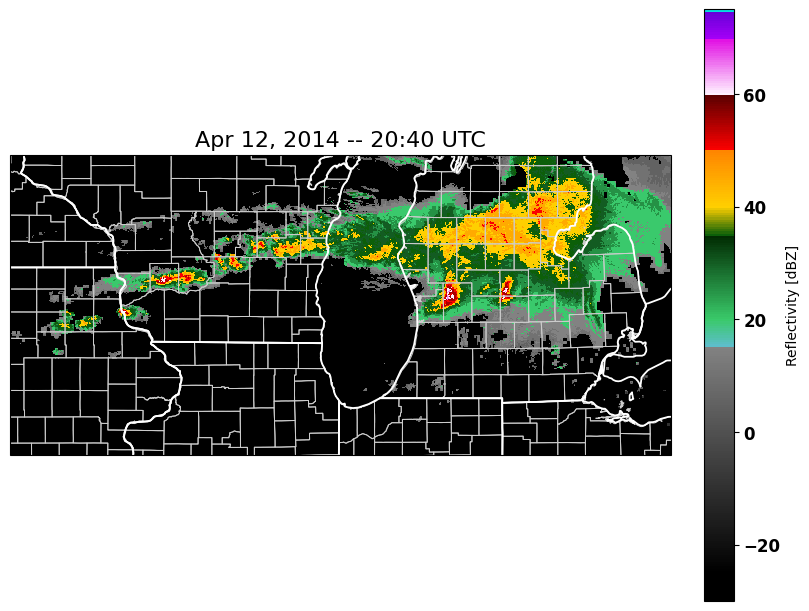

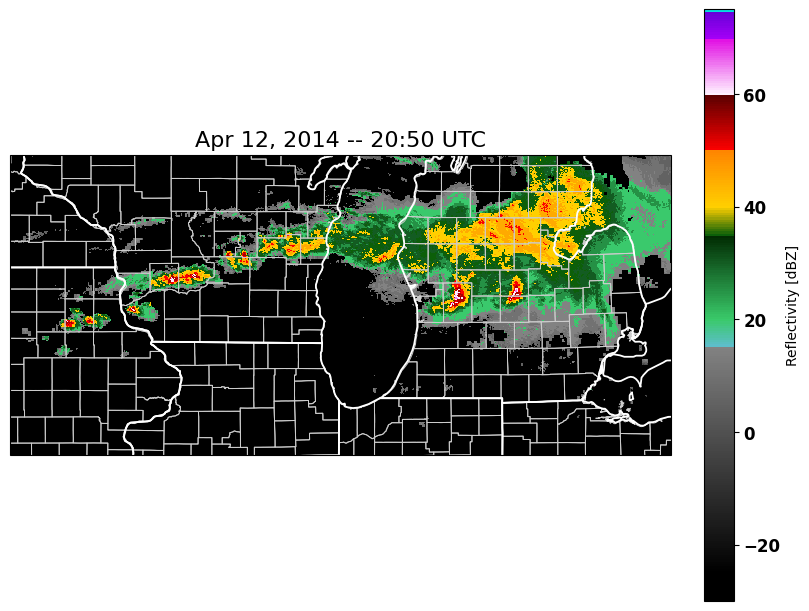

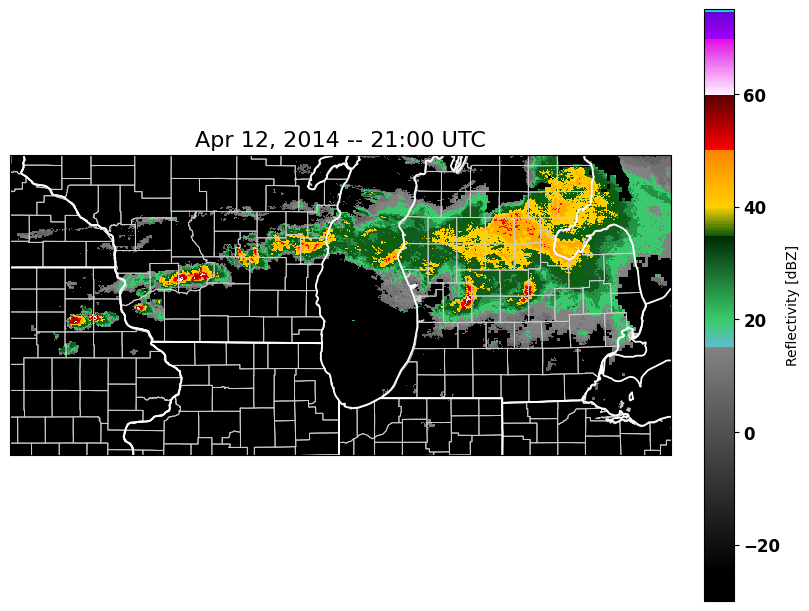

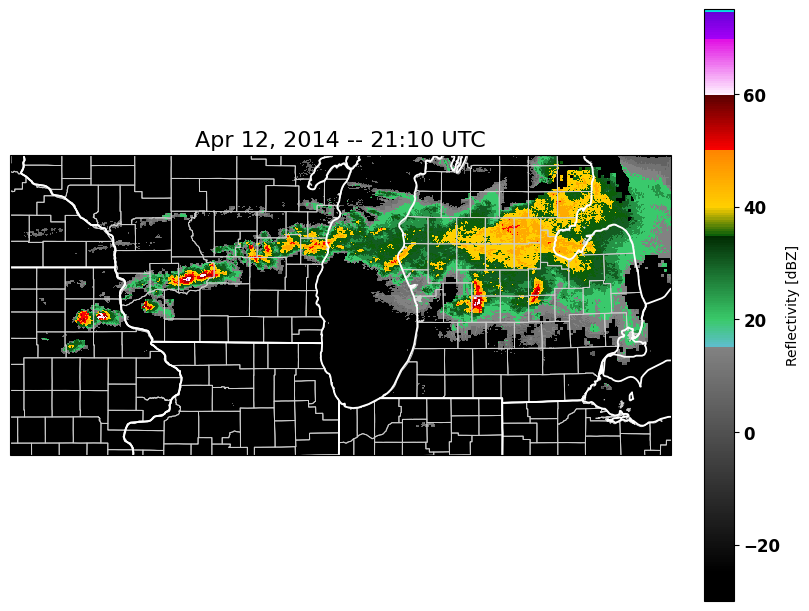

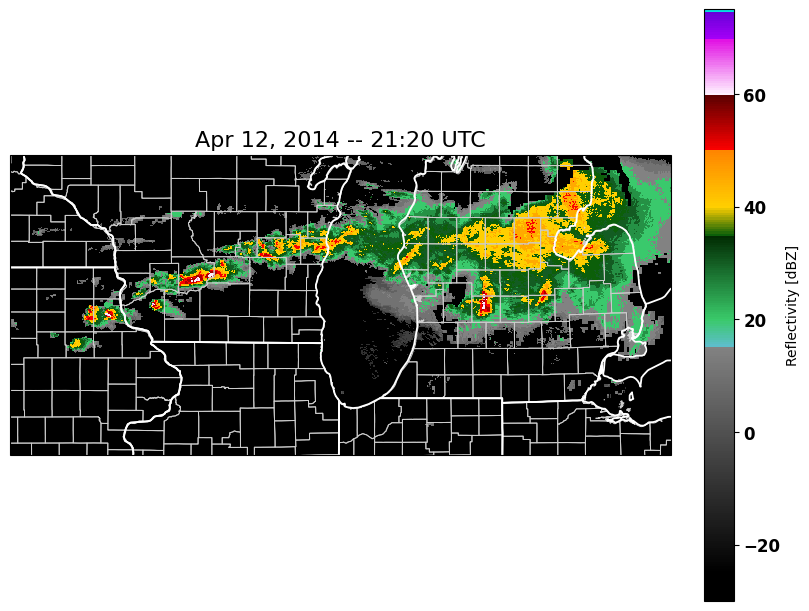

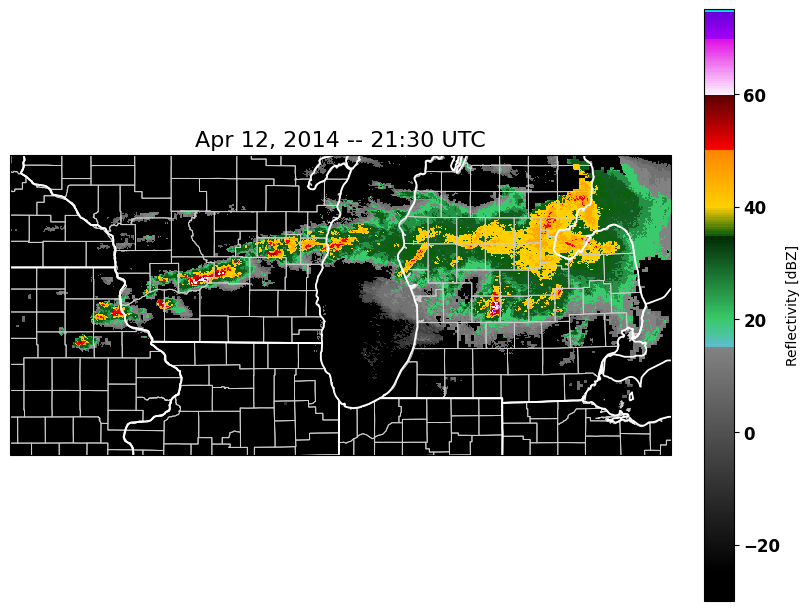

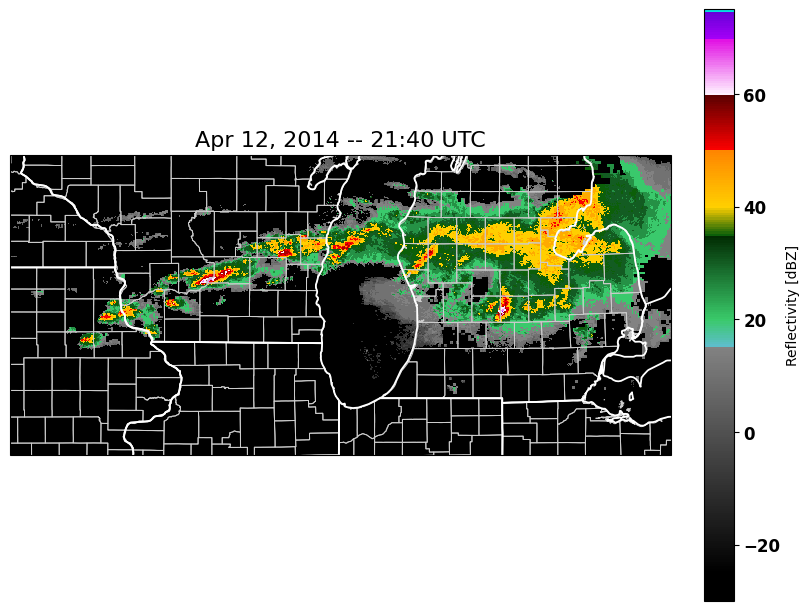

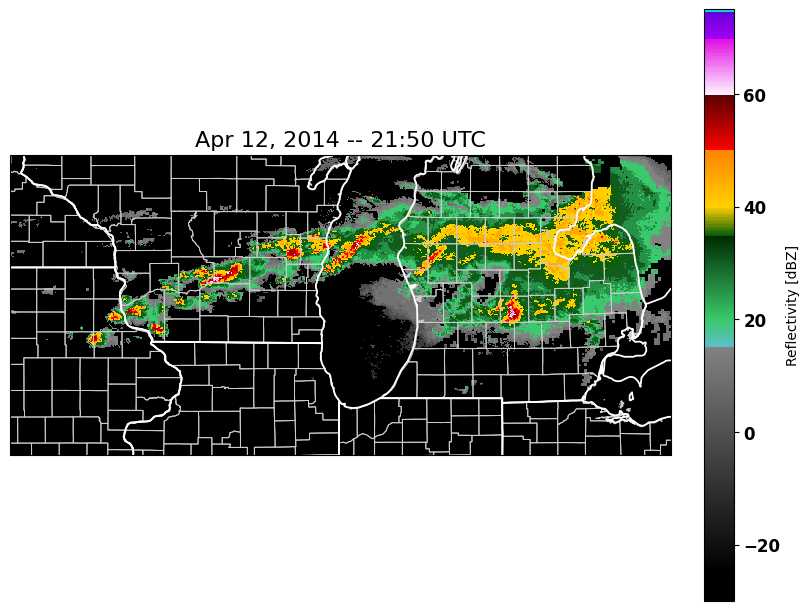

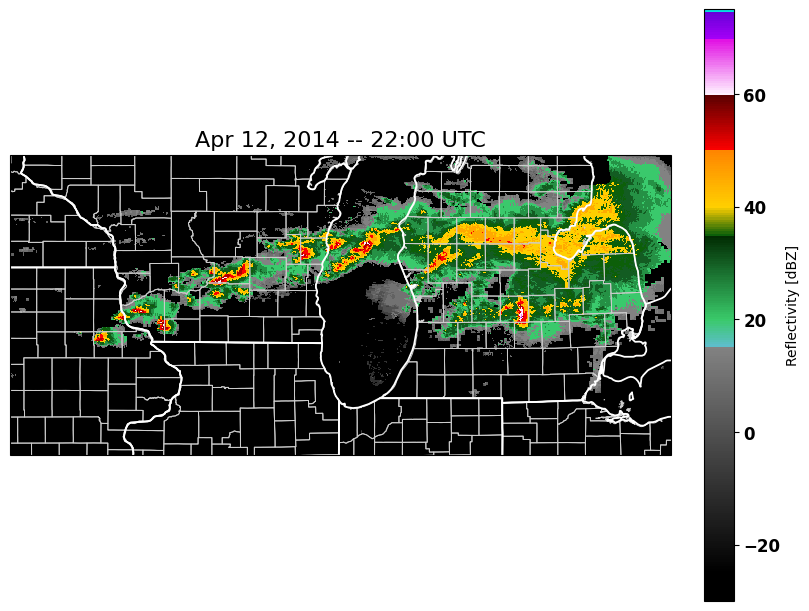

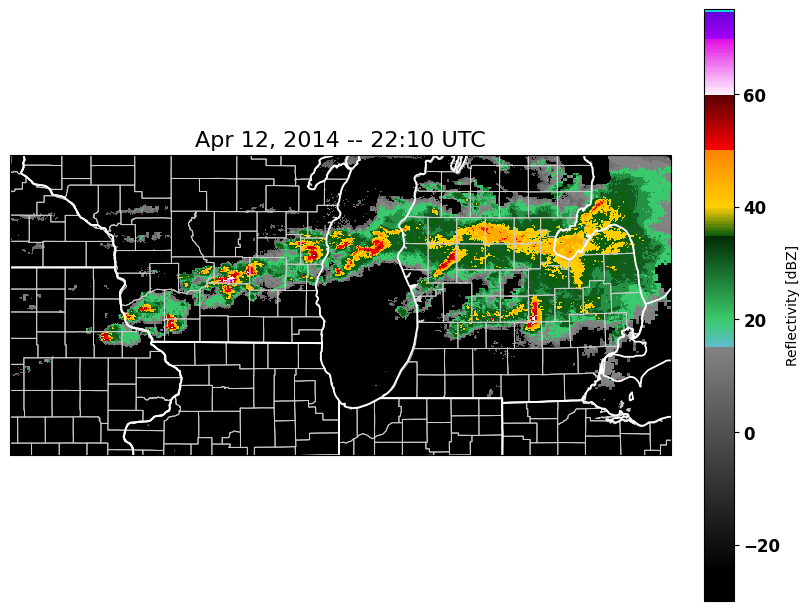

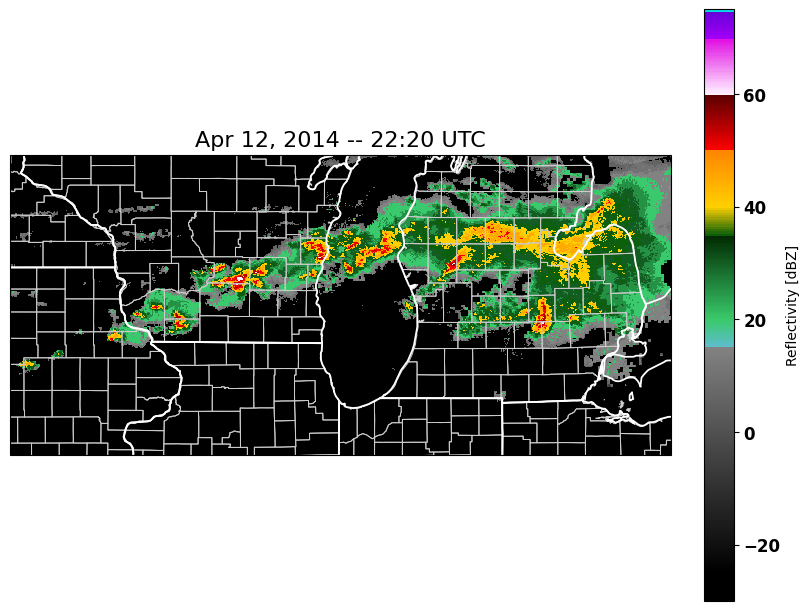

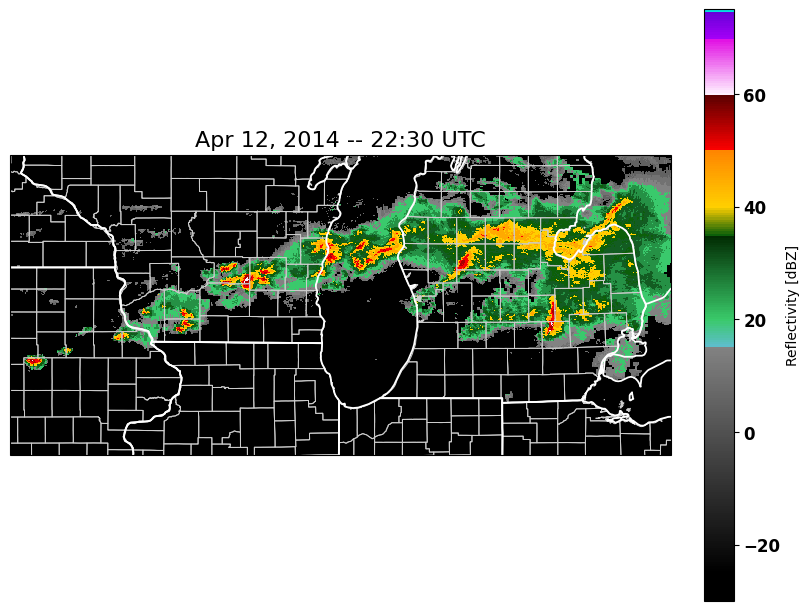

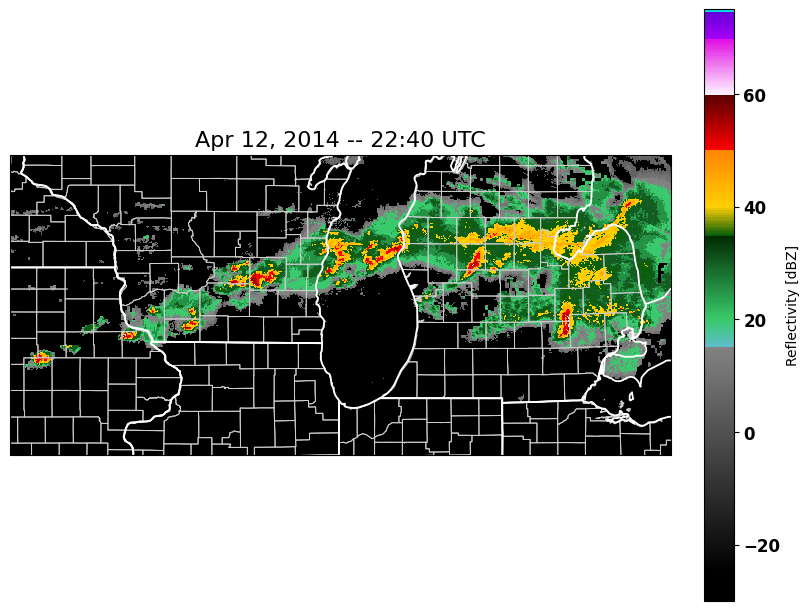

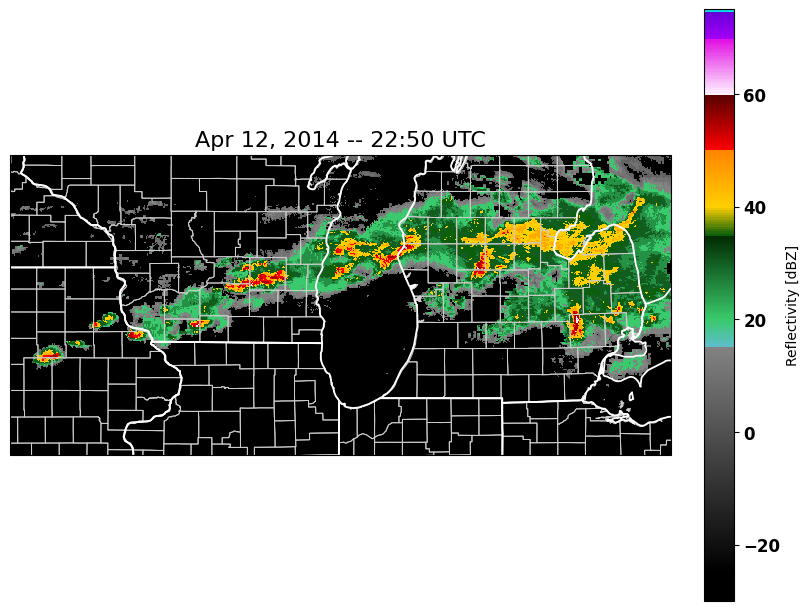

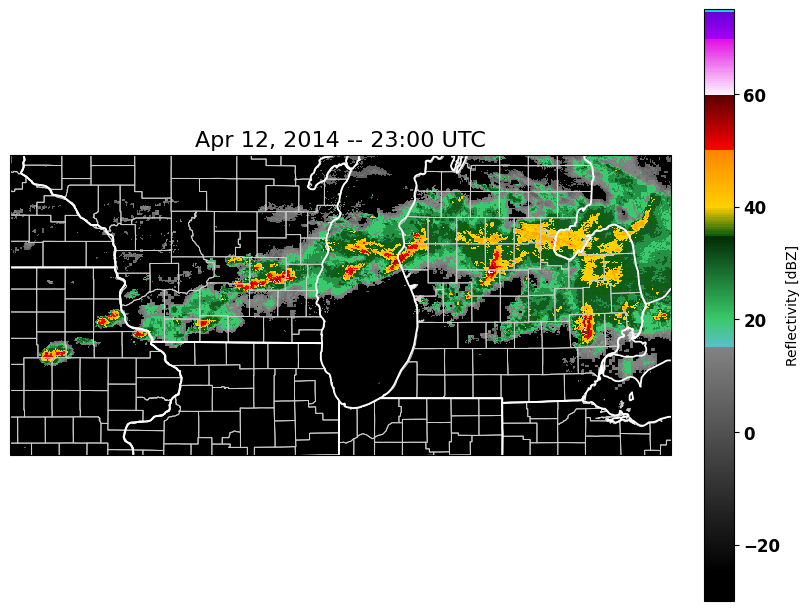

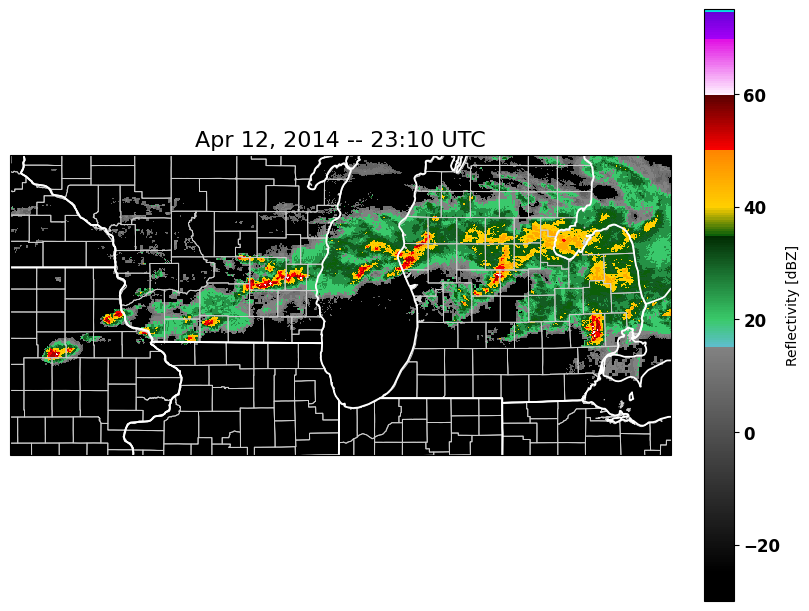

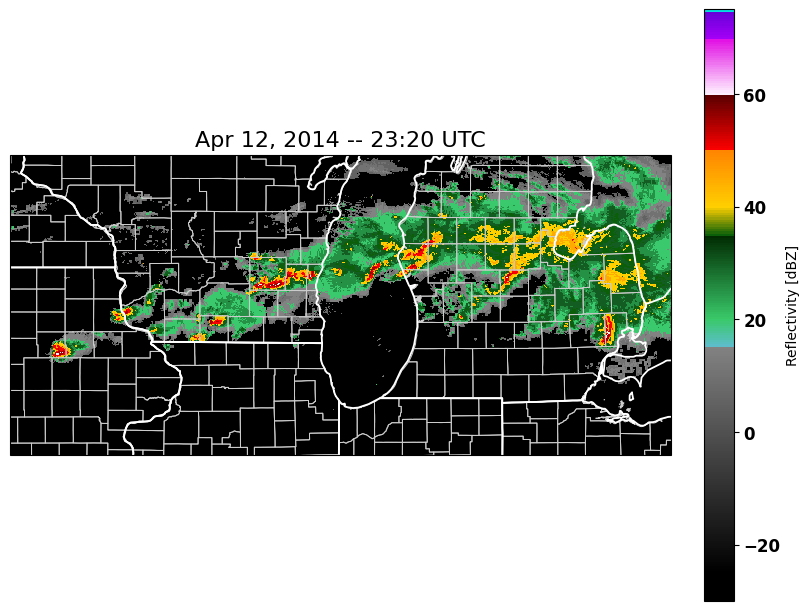

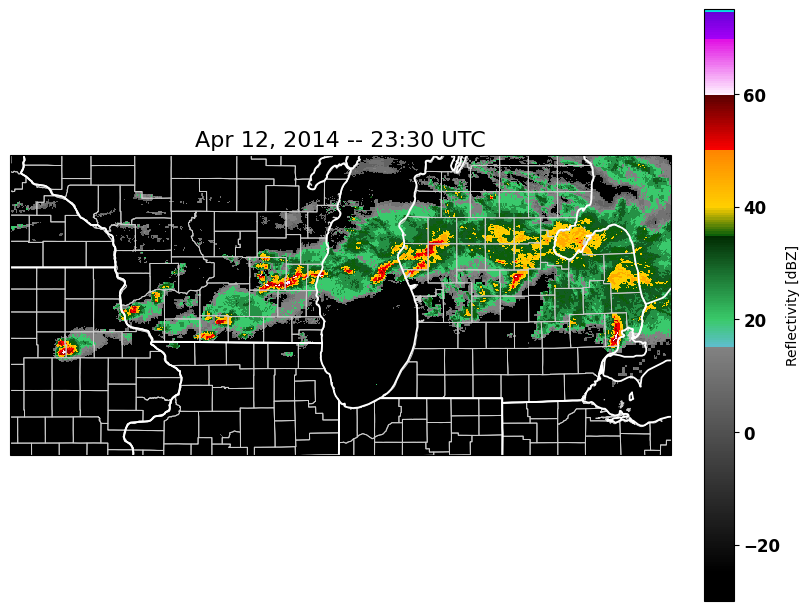

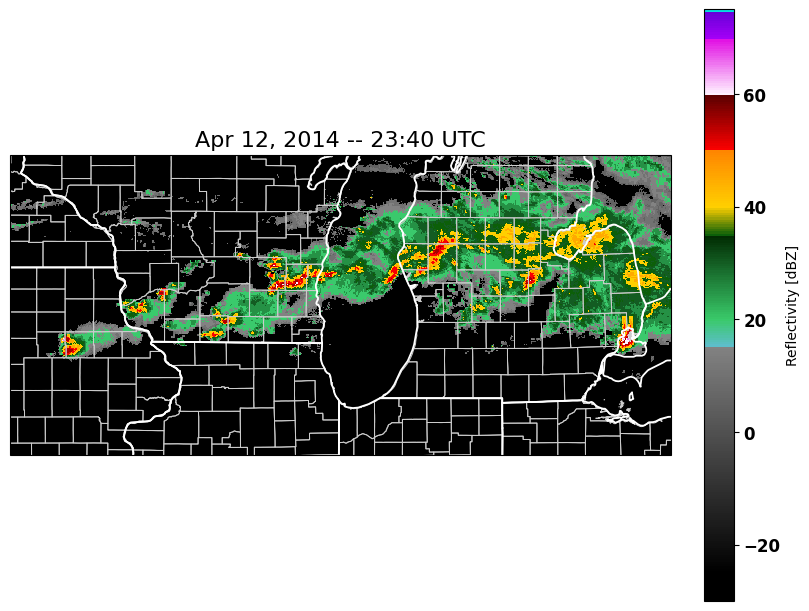

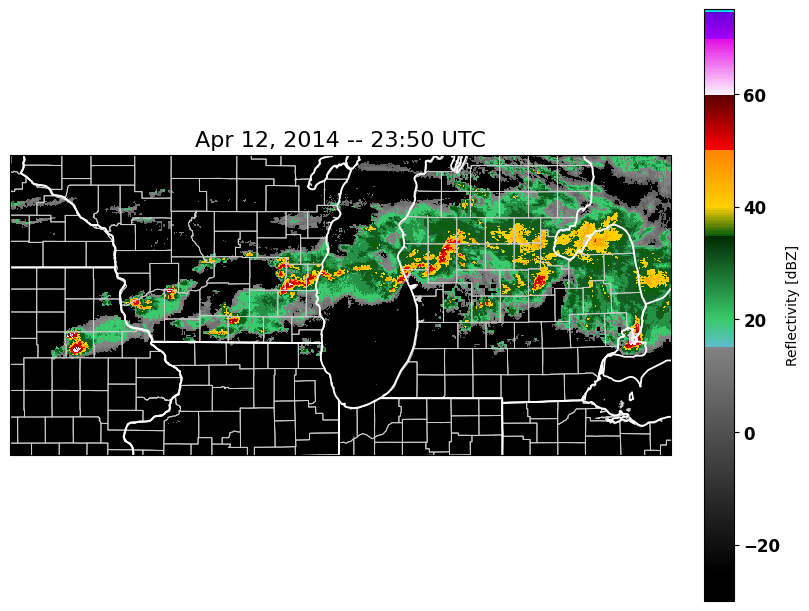

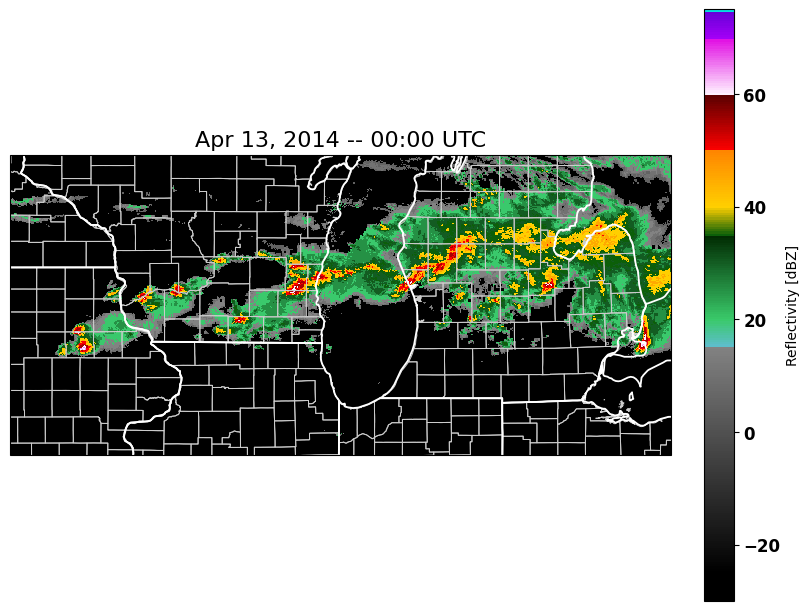

In [15]:
# @title <font size="+3" color="green">Create your images!</font>
import matplotlib as mpl

def create_valid_times(start_dt, end_dt):

  #start_time = datetime.strptime(initial_time, "%Y%m%d_%H%M")
  #end_time = datetime.strptime(final_time, "%Y%m%d_%H%M")

  valid_times = []
  i = 0
  this_time = start_dt + timedelta(minutes=time_step*i)
  valid_times.append(this_time)
  while this_time < end_dt:
    i += 1
    this_time = start_dt + timedelta(minutes=time_step*i)
    valid_times.append(this_time)

  return valid_times

valid_times = create_valid_times(start_datetime,end_datetime)


# ------------- Download pngs, create plots, save images -------------

URL_BASE = "https://mesonet.agron.iastate.edu/archive/data/"

os.chdir('/content')
# create fresh images directory to store new images to
result = subprocess.run(["rm -rf images ; mkdir images"], shell=True, capture_output=True, text=True)
#fout = open('output.txt', 'w')
#fout.write(f'dts,station,ref\n')
for plot_time in valid_times:
  local_time = plot_time - timedelta(hours=time_zone_dict[time_zone])

  file_dirs = datetime.strftime(plot_time,"%Y/%m/%d/GIS/uscomp/")
  file_timestamp = datetime.strftime(plot_time,"_%Y%m%d%H%M")
  url_path = f'{URL_BASE}{file_dirs}'
  file_root = f'{file_type}{file_timestamp}'
  downloaded_png = f'{file_root}.png'
  png_url = f'{url_path}{file_root}.png'
  wld_url = f'{url_path}{file_root}.wld'
  if not exists(downloaded_png):
    map = urllib.request.urlretrieve(png_url,downloaded_png)

  with rasterio.open(downloaded_png) as src:
    # Get the image data and metadata
    image_data = src.read()

    #slice (x,y) cartesian array out of current (1,x,y) array
    image_new = image_data[0,:,:]

    # convert 8-bit (0-255) values to reflectivity values as described at
    # https://mesonet.agron.iastate.edu/GIS/rasters.php?rid=2

    image_new = (image_new * plot_values['mult']) - plot_values['subt']


    #flip data vertically to move origin from upper left to lower left
    image_flipped = np.flipud(image_new)

    # determine images dimensions
    xlen = np.shape(image_flipped)[1]
    ylen = np.shape(image_flipped)[0]

    # create list of lat/lon values based on dimension lengths
    x = list(np.linspace(-126.0, -65.0, num=xlen, retstep=True)[0])
    y = list(np.linspace(23.0, 50.0, num=ylen, retstep=True)[0])

    # Create xarray add latitude/longitude dimensions using lists above
    coords = {'longitude': x, 'latitude': y}
    data = xr.DataArray(image_flipped, coords=coords, dims=['latitude', 'longitude'])
    data.attrs["units"] = "dBZ"
    data.attrs["long_name"] = "Reflectivity"

    # Determine region you want to plot
    subset = data.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

    fig, ax = plt.subplots(1,1,figsize=(fig_height,fig_width),layout='constrained',subplot_kw={'projection': ccrs.PlateCarree()})
    subset.plot(ax=ax, cmap=plot_values['cmap'], vmin=plot_values['vmin'], vmax=plot_values['vmax'])


    ax.set_aspect(plot_aspect_ratio)
    if plot_counties:
      ax.add_feature(COUNTY_SHAPEFILE, facecolor='none', edgecolor='#cccccc', linewidth=0.7)

    if plot_roads:
      ax.add_feature(ROAD_SHAPEFILE, facecolor='none', edgecolor='cyan', linewidth=0.5)
    ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='white', linewidth=1.3)
    ax.set_title(datetime.strftime(local_time,f'%b %d, %Y -- %I:%M %p {time_zone}'), color='black')
    if time_zone == 'UTC':
      ax.set_title(datetime.strftime(local_time,f'%b %d, %Y -- %H:%M {time_zone}'), color='black')
    #plt.tight_layout()
    target_fname = f'images/cropped_{downloaded_png}'
    if plot_cities:
      for key in cities:
        c = cities[key]
        lat,lon = c['lat'], c['lon']
        if ((lat > lat_min) & (lat < lat_max) & (lon > lon_min) & (lon < lon_max)):
          if 'MC' in key:
            plt.plot([lon], [lat], color='#FFAAAA', linewidth=1, marker='o', markersize=4, zorder=10)
            plt.text(lon + c['lon_offset'], lat + c['lat_offset'], key, color='#FFAAAA', zorder=11)
          else:
            plt.plot([lon], [lat], color='#FFFF00', linewidth=1, marker='o', markersize=6, zorder=10)
            plt.plot([lon], [lat], color='white', linewidth=1, marker='o', markersize=4, zorder=10)
            plt.text(lon + c['lon_offset'], lat + c['lat_offset'], key, color='#FFFFFF', zorder=11)
    plt.savefig(target_fname,bbox_inches='tight')


import glob
import os

if create_animation:
  !apt install imagemagick &> /dev/null
  os.chdir('/content/images')
  cmd = f'convert -delay 25 -loop 0 *.png /content/animation.gif'
  os.system(cmd)

# tar images files together so you can download single file
os.chdir('/content/')
with zipfile.ZipFile('radar_images.zip', 'w') as f:
    for file in glob.glob('images/*'):
        f.write(file)

